In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('2014_nyc_taxi_trips_neighbor_final.csv')

In [4]:
data.head()

,Unnamed: 0,fare_amount,passenger_count,weekday,weekend,day_night,distance,neighborhood,datekey,tripPerHour,holiday
0,0,12.5,1,2,0,1,1.619554,"('Theater District', 'Gramercy')",2014-02-19-07,1066,0
1,1,10.5,1,2,0,1,1.789184,"('Upper East Side', 'Murray Hill')",2014-02-19-07,1066,0
2,2,8.0,1,2,0,1,1.697914,"('Gramercy', 'Midtown')",2014-02-19-07,1066,0
3,3,20.5,2,2,0,1,1.720657,"('Upper East Side', 'Midtown')",2014-02-19-07,1066,0
4,4,25.0,1,2,0,1,4.554564,"('Upper East Side', 'Battery Park City')",2014-02-19-07,1066,0


In [5]:
data['pickup'] = data['neighborhood'].map(lambda x: x.split(',')[0][2:-1])
data['dropoff'] = data['neighborhood'].map(lambda x: x.split(',')[1][2:-2])

In [6]:
data.head()

,Unnamed: 0,fare_amount,passenger_count,weekday,weekend,day_night,distance,neighborhood,datekey,tripPerHour,holiday,pickup,dropoff
0,0,12.5,1,2,0,1,1.619554,"('Theater District', 'Gramercy')",2014-02-19-07,1066,0,Theater District,Gramercy
1,1,10.5,1,2,0,1,1.789184,"('Upper East Side', 'Murray Hill')",2014-02-19-07,1066,0,Upper East Side,Murray Hill
2,2,8.0,1,2,0,1,1.697914,"('Gramercy', 'Midtown')",2014-02-19-07,1066,0,Gramercy,Midtown
3,3,20.5,2,2,0,1,1.720657,"('Upper East Side', 'Midtown')",2014-02-19-07,1066,0,Upper East Side,Midtown
4,4,25.0,1,2,0,1,4.554564,"('Upper East Side', 'Battery Park City')",2014-02-19-07,1066,0,Upper East Side,Battery Park City


In [7]:
datause = data.drop(['Unnamed: 0', 'neighborhood', 'datekey'], axis=1)
datause.head()

,fare_amount,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday,pickup,dropoff
0,12.5,1,2,0,1,1.619554,1066,0,Theater District,Gramercy
1,10.5,1,2,0,1,1.789184,1066,0,Upper East Side,Murray Hill
2,8.0,1,2,0,1,1.697914,1066,0,Gramercy,Midtown
3,20.5,2,2,0,1,1.720657,1066,0,Upper East Side,Midtown
4,25.0,1,2,0,1,4.554564,1066,0,Upper East Side,Battery Park City


In [8]:
datause.shape

(7986341, 10)

Text(0.5, 1.0, 'The distribution of taxi fare amount')

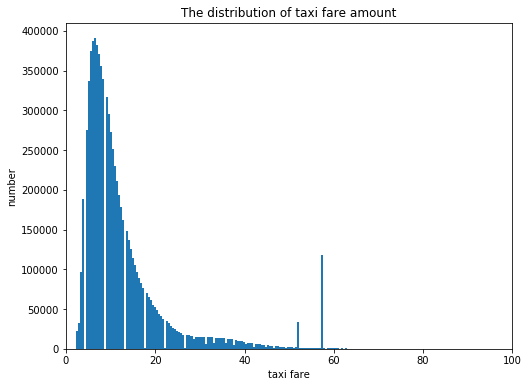

In [9]:
fig = plt.figure(figsize=(8,6))
plt.hist(datause.fare_amount, 1000)
plt.xlim(0,100)
plt.xlabel('taxi fare')
plt.ylabel('number')
plt.title('The distribution of taxi fare amount')

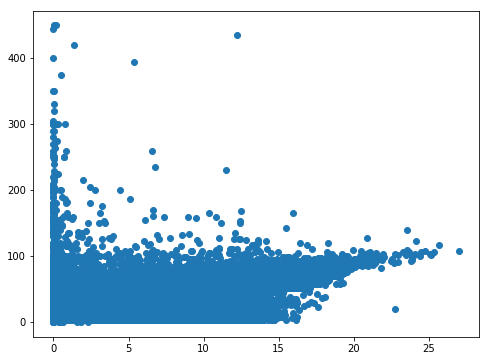

In [10]:
fig = plt.figure(figsize=(8,6))
plt.scatter(datause.distance, datause.fare_amount)

In [11]:
[datause[c].dtype.name for c in datause.columns]

['float64',
 'int64',
 'int64',
 'int64',
 'int64',
 'float64',
 'int64',
 'int64',
 'object',
 'object']

In [12]:
datause[datause.columns[2:5]] = datause[datause.columns[2:5]].astype('str')
datause[datause.columns[-3]] = datause[datause.columns[-3]].astype('str')

In [13]:
[datause[c].dtype.name for c in datause.columns]

['float64',
 'int64',
 'object',
 'object',
 'object',
 'float64',
 'int64',
 'object',
 'object',
 'object']

In [14]:
# datatest = datause.copy()

In [15]:
# [datatest[c].dtype.name for c in datatest.columns]

In [16]:
# for c in datatest.columns:
#     if datatest[c].dtype.name != 'object':
#         print(c)
#         datatest[c] = preprocessing.normalize(np.array(datatest[c]).reshape(-1,1), axis=0)

In [17]:
# datatest.head()

In [18]:
# [datatest[c].dtype.name for c in datatest.columns]

In [19]:
# Use LabelEncoder convert data to categorical 
for c in datause.columns:
    if datause[c].dtype.name == 'object':
        labelencoder = LabelEncoder()
        datause[c] = labelencoder.fit_transform(datause[c])

In [20]:
datause.head()

,fare_amount,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday,pickup,dropoff
0,12.5,1,2,0,1,1.619554,1066,0,205,103
1,10.5,1,2,0,1,1.789184,1066,0,215,160
2,8.0,1,2,0,1,1.697914,1066,0,98,150
3,20.5,2,2,0,1,1.720657,1066,0,215,150
4,25.0,1,2,0,1,4.554564,1066,0,215,6


In [21]:
X = datause[datause.columns[1:]]
Y = datause[datause.columns[0]]

## Linear regression

In [22]:
X_linear = X[X.columns[:-2]]
X_linear.head()

,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday
0,1,2,0,1,1.619554,1066,0
1,1,2,0,1,1.789184,1066,0
2,1,2,0,1,1.697914,1066,0
3,2,2,0,1,1.720657,1066,0
4,1,2,0,1,4.554564,1066,0


In [23]:
X_linear[X_linear.columns[1:4]] = X_linear[X_linear.columns[1:4]].astype('str')
X_linear[X_linear.columns[-1]] = X_linear[X_linear.columns[1:4]].astype('str')

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
[X_linear[c].dtype.name for c in X_linear.columns]

['int64', 'object', 'object', 'object', 'float64', 'int64', 'object']

In [25]:
X_dummy = pd.get_dummies(X_linear)
X_dummy.head()

,passenger_count,distance,tripPerHour,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,...,weekend_1,day_night_0,day_night_1,holiday_0,holiday_1,holiday_2,holiday_3,holiday_4,holiday_5,holiday_6
0,1,1.619554,1066,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,1.789184,1066,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1.697914,1066,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2,1.720657,1066,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,4.554564,1066,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=0.3, random_state=100)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5590438, 21), (2395903, 21), (5590438,), (2395903,))

In [28]:
lr = LinearRegression().fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [29]:
#The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(Y_test, Y_pred))
print(lr.score(X_test, Y_test))

Mean squared error: 17.218786
Variance score: 0.83580
0.8357996825118191


In [43]:
#Tuning the parameters
# from sklearn.model_selection import GridSearchCV
# param_grid ={'alpha':np.logspace(-4, 1, 200)}

# os=[]
# for i in range(10):
#     X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size = 0.3, random_state = i)
#     rid=linear_model.Ridge()
#     gr=GridSearchCV(rid,param_grid=param_grid)
#     rs=gr.fit(X_train,Y_train)
#     print (rs.best_params_)
#     os.append(rs.score(X_test, Y_test))
# print (np.mean(os))

### lasso


In [30]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1).fit(X_train, Y_train)
print(clf.score(X_train, Y_train))

0.8322282872339494


## Ensemble methods

### Decision Trees

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [33]:
from sklearn import tree
dt = tree.DecisionTreeRegressor().fit(x_train, y_train)
dt.score(x_test, y_test)

0.746020746984891

### Bagging meta-estimator

In [37]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bg = BaggingRegressor(DecisionTreeRegressor())
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)
MSE_bg = mean_squared_error(y_test, y_pred)
R_bg = bg.score(x_test, y_test)
print('The Mean Squared Error is:', MSE_bg)
print('The R^2 of the prediction is:', R_bg)

The Mean Squared Error is: 15.007189121957566
The R^2 of the prediction is: 0.8568897235794168


### Ada Boosting

In [40]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
MSE_ab = mean_squared_error(y_test, y_pred)
R_ab = ab.score(x_test, y_test)
print('The Mean Squared Error is:', MSE_ab)
print('The R^2 of the prediction is:', R_ab)

The Mean Squared Error is: 29.919363113664936
The R^2 of the prediction is: 0.7146855223367863


### Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
MSE_gb = mean_squared_error(y_test, y_pred)
R_gb = ab.score(x_test, y_test)
print('The Mean Squared Error is:', MSE_gb)
print('The R^2 of the prediction is:', R_gb)

The Mean Squared Error is: 14.877438915728371
The R^2 of the prediction is: 0.856299525350564


### Random forest

In [42]:
#def RandomForest(x_train, y_train, x_test, y_test):   
rf = RandomForestRegressor()
rf.fit(x_train, y_train)   
y_pred = rf.predict(x_test)
MSE_rf = mean_squared_error(y_test, y_pred)
R_rf = rf.score(x_test, y_test)
    

importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
    
print('The Mean Squared Error is:', MSE_rf)
print('The R^2 of the prediction is:', R_rf)
print('-------------------------------------------------')
print('The Feature Importance is:')
print(importances)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The Mean Squared Error is: 15.00048826930988
The R^2 of the prediction is: 0.8569536236786873
-------------------------------------------------
The Feature Importance is:
                 importance
feature                    
distance            0.88629
tripPerHour         0.04112
dropoff             0.02513
pickup              0.02122
weekday             0.00991
day_night           0.00732
passenger_count     0.00662
weekend             0.00141
holiday             0.00098
